#Business Understanding and Data Acquisition

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define assets and time period
tickers = ['XLK', 'XLF', 'XLV', 'XLE', 'XLI', 'XLY', 'XLP', 'XLU', 'XLB', 'SPY'] # US Sectors + Overall Market
start_date = '2018-01-01'
end_date = '2025-3-31'

# Download data
data = yf.download(tickers, start=start_date, end=end_date)
prices = data['Close'].dropna() # Use Adjusted Close prices

/tmp/ipython-input-2820221982.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed


#Data Preparation and Calculating Returns

In [4]:
# Calculate daily percentage returns
returns = prices.pct_change().dropna()

# Check for any remaining missing values and inspect the data
print(returns.isnull().sum())
print(f"Returns DataFrame shape: {returns.shape}")
returns.head()

Ticker
SPY    0
XLB    0
XLE    0
XLF    0
XLI    0
XLK    0
XLP    0
XLU    0
XLV    0
XLY    0
dtype: int64
Returns DataFrame shape: (1819, 10)


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,
2018-01-03,0.006325,0.007004,0.014976,0.005372,0.005386,0.008341,-0.000354,-0.007856,0.009568,0.004591
2018-01-04,0.004215,0.008735,0.006036,0.009263,0.007317,0.005055,0.002831,-0.008305,0.001422,0.003279
2018-01-05,0.006664,0.008018,-0.000400,0.002824,0.006876,0.010517,0.004410,-0.000389,0.008517,0.007922
2018-01-08,0.001829,0.001432,0.006003,-0.001408,0.004123,0.003771,0.002459,0.009351,-0.003636,0.001179
2018-01-09,0.002263,-0.001589,-0.002519,0.007755,0.006415,-0.002555,-0.001402,-0.009844,0.011773,0.001963


#Exploratory Data Analysis (EDA)

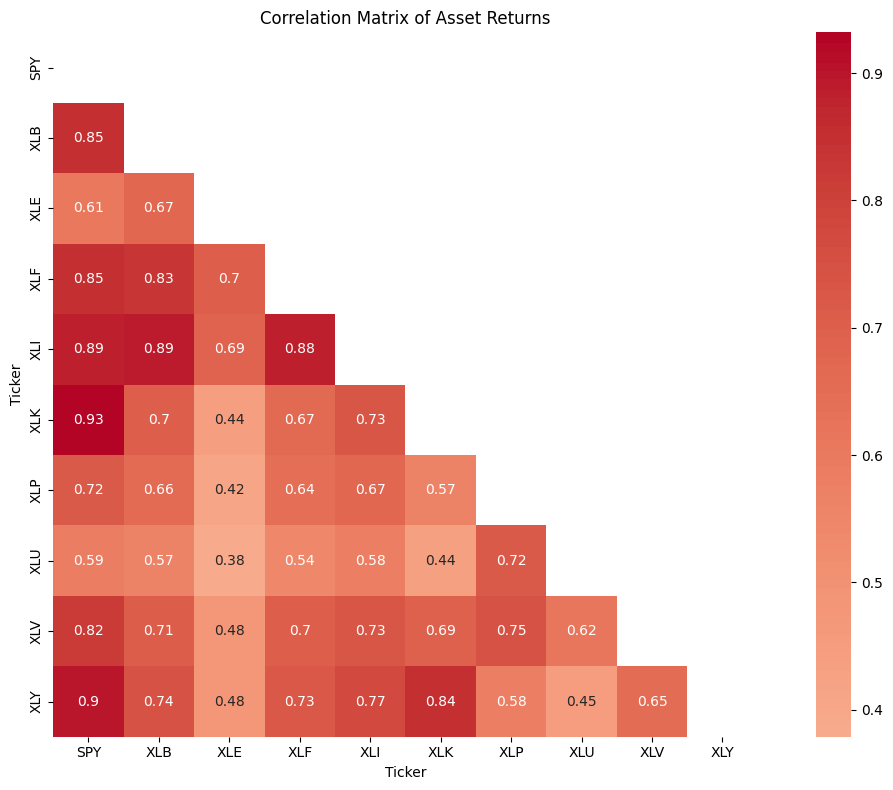

Ticker          SPY          XLB          XLE          XLF          XLI  \
count   1819.000000  1819.000000  1819.000000  1819.000000  1819.000000   
mean       0.000538     0.000357     0.000514     0.000504     0.000456   
std        0.012202     0.013930     0.020386     0.015120     0.013579   
min       -0.109424    -0.110084    -0.201412    -0.137094    -0.113442   
25%       -0.004502    -0.006957    -0.009119    -0.006254    -0.005636   
50%        0.000777     0.000619     0.000887     0.000849     0.000924   
75%        0.006674     0.007879     0.010268     0.007739     0.007251   
max        0.090603     0.117601     0.160374     0.131566     0.126512   

Ticker          XLK          XLP          XLU          XLV          XLY  
count   1819.000000  1819.000000  1819.000000  1819.000000  1819.000000  
mean       0.000815     0.000350     0.000434     0.000428     0.000524  
std        0.016484     0.009960     0.013138     0.010985     0.014970  
min       -0.138140    -0.09

In [5]:
plt.figure(figsize=(12, 8))
corr_matrix = returns.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle for clarity
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Asset Returns')
plt.tight_layout()
plt.show()

# Descriptive Statistics
print(returns.describe())

#Data Standardization

In [6]:
# Standardize the returns
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)
returns_scaled = pd.DataFrame(returns_scaled, columns=returns.columns, index=returns.index)

#Applying PCA

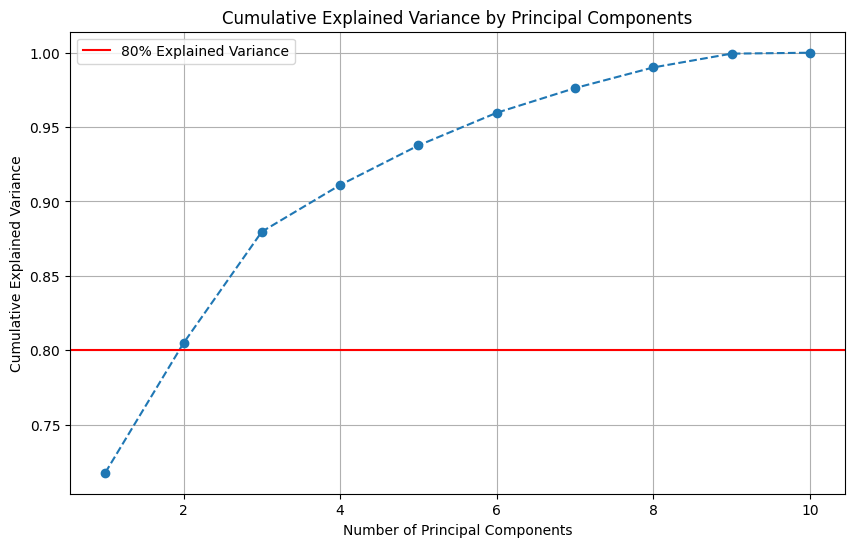

Explained variance by component:
 [7.17670992e-01 8.71316063e-02 7.48870136e-02 3.13725584e-02
 2.65979640e-02 2.19651020e-02 1.65864064e-02 1.38881778e-02
 9.27742090e-03 6.22759085e-04]


In [7]:
# Fit PCA on the standardized returns
pca = PCA()
pca.fit(returns_scaled)

# Plot the Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Explained Variance') # Common threshold
plt.legend()
plt.grid(True)
plt.show()

# Print the explained variance
print("Explained variance by component:\n", pca.explained_variance_ratio_)

# Interpreting the Results (The Most Important Step)

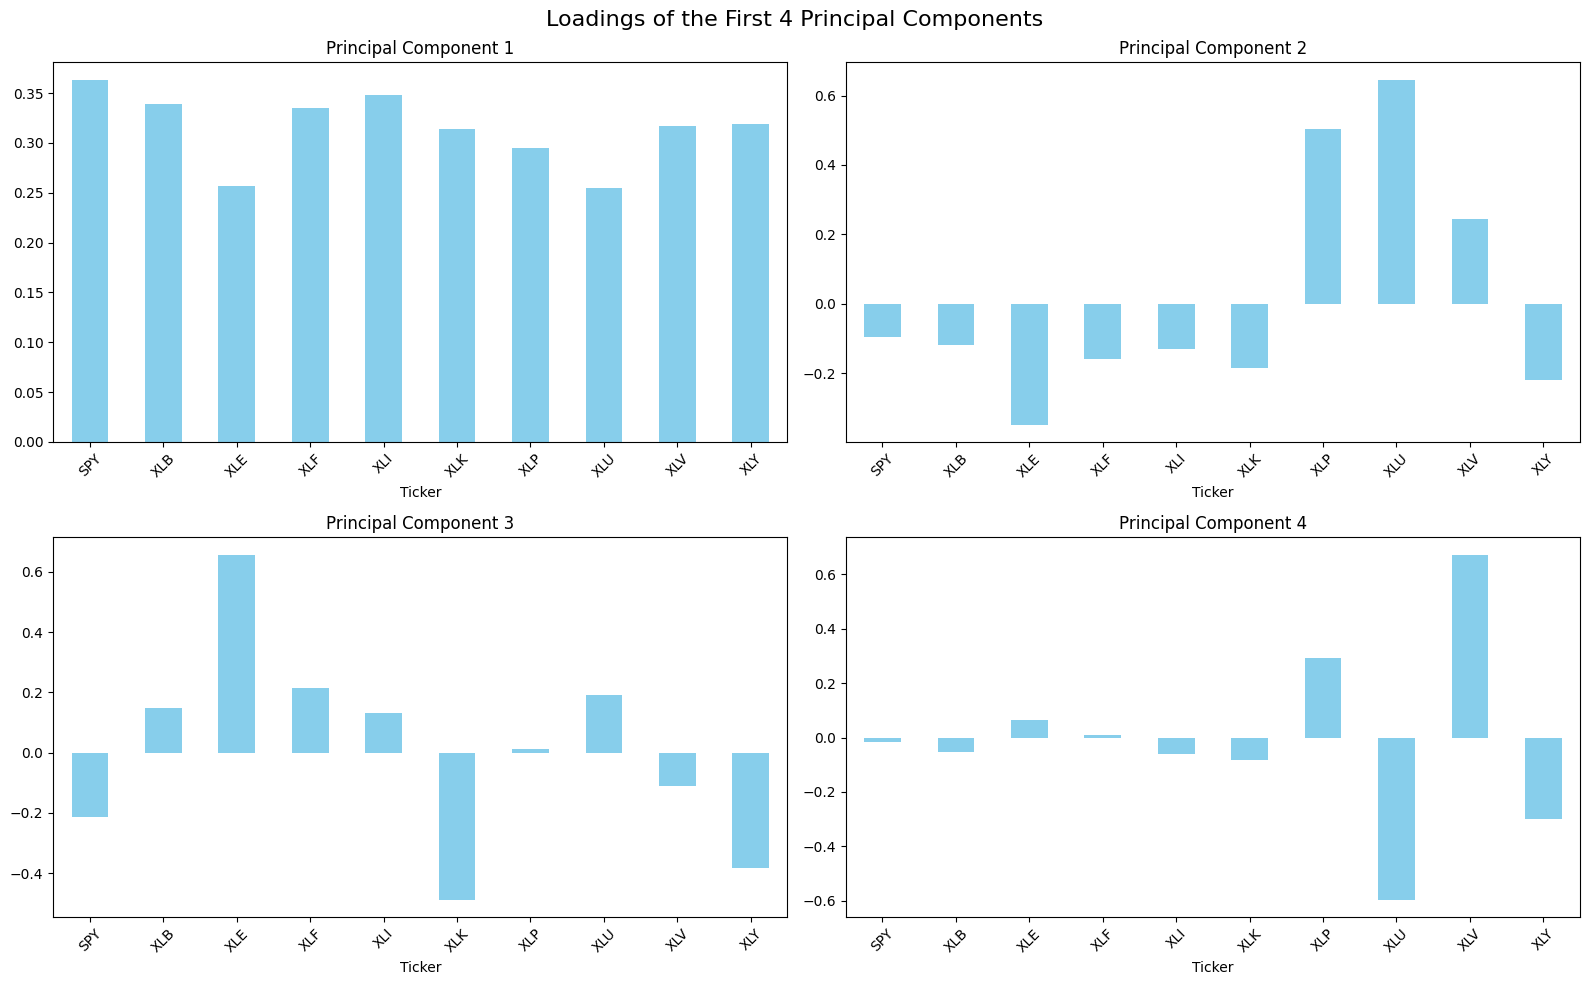

In [8]:
# Get the components and create a DataFrame for interpretation
components = pca.components_
df_components = pd.DataFrame(components, columns=returns.columns, index=[f'PC{i+1}' for i in range(len(components))]).T

# Plot the loadings for the first 3-4 PCs
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Loadings of the First 4 Principal Components', fontsize=16)
for i, ax in enumerate(axes.flatten()[:4]): # Plot first 4 PCs
    df_components[f'PC{i+1}'].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Principal Component {i+1}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#Transforming the Data and Creating Insights

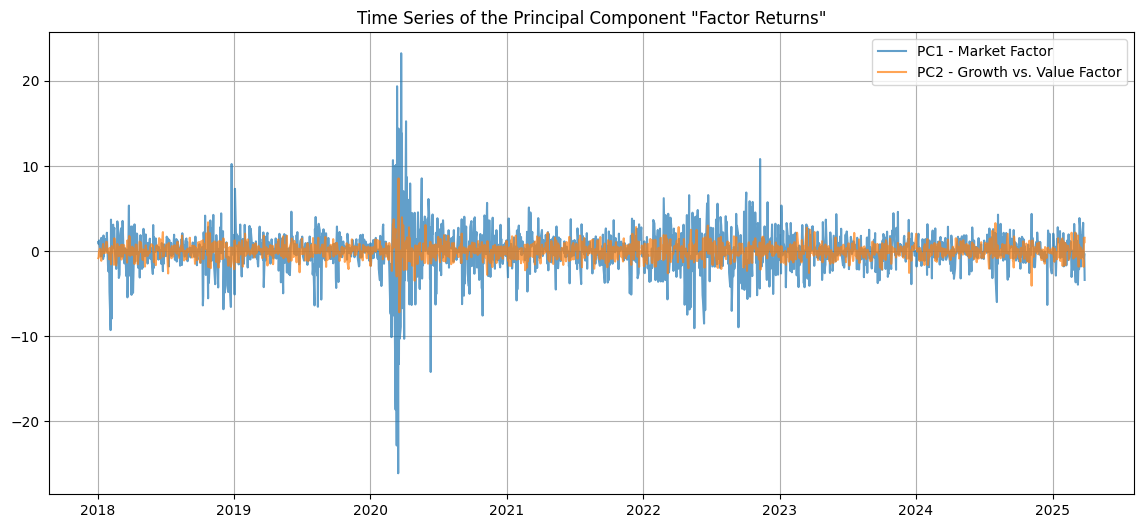

In [9]:
# Transform the standardized data using PCA
pca_results = pca.transform(returns_scaled)
df_pca = pd.DataFrame(pca_results, columns=[f'PC{i+1}' for i in range(pca_results.shape[1])], index=returns_scaled.index)

# Plot the time series of the first few components
plt.figure(figsize=(14, 6))
plt.plot(df_pca['PC1'], label='PC1 - Market Factor', alpha=0.7)
plt.plot(df_pca['PC2'], label='PC2 - Growth vs. Value Factor', alpha=0.7)
plt.title('Time Series of the Principal Component "Factor Returns"')
plt.legend()
plt.grid(True)
plt.show()